In [1]:
import pydotplus  # you can install pydotplus with: pip install pydotplus 
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def print_graph(clf, feature_names):
    """Print decision tree."""
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False, 
        out_file=None, 
        feature_names=feature_names,
        class_names={0:"D", 1:"R"},
        filled=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())

In [3]:
import pandas as pd
import numpy as np

In [7]:
lsp_data1=pd.read_csv('/Users/chenhui/works/fingerprint/output/path/sp1.csv',encoding='gbk')
lsp_data2=pd.read_csv('/Users/chenhui/works/fingerprint/output/path/sp2.csv',encoding='gbk')
lsp1=np.mat(lsp_data1['SP']).reshape(-1,1)
lsp2=np.mat(lsp_data2['SP']).reshape(-1,1)

In [16]:
# xtrain = lsp_data1['SP']
# xtest = lsp_data2['SP']
xtrain = lsp1
xtest = lsp2
ytrain = lsp_data1['link'].values
ytest = lsp_data2['link'].values

In [12]:
SEED = 222

Decision tree ROC-AUC score: 0.952


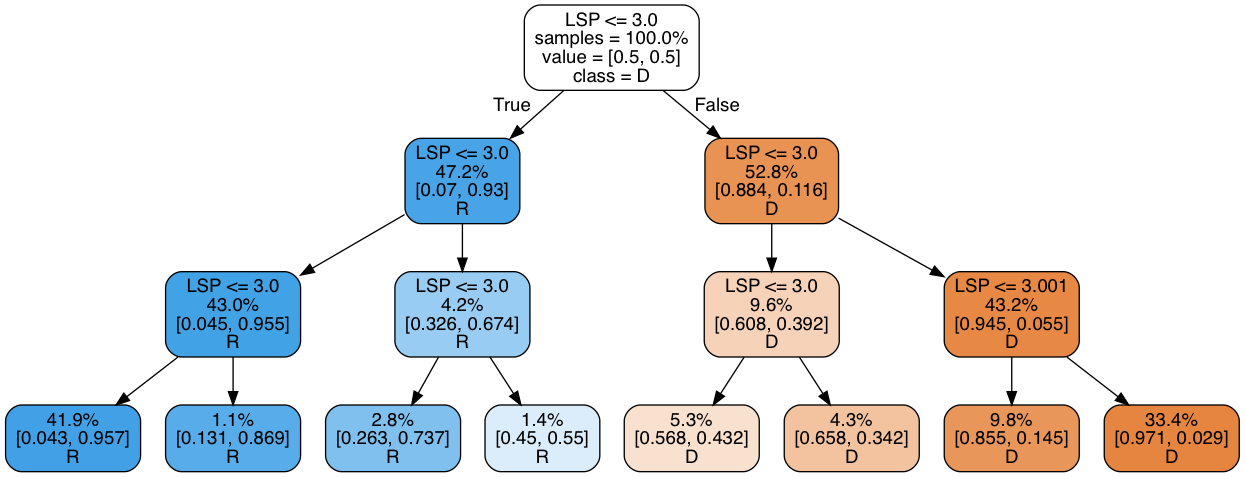

In [21]:
t1 = DecisionTreeClassifier(max_depth=3, random_state=SEED)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]
print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))
print_graph(t1, ['LSP'])

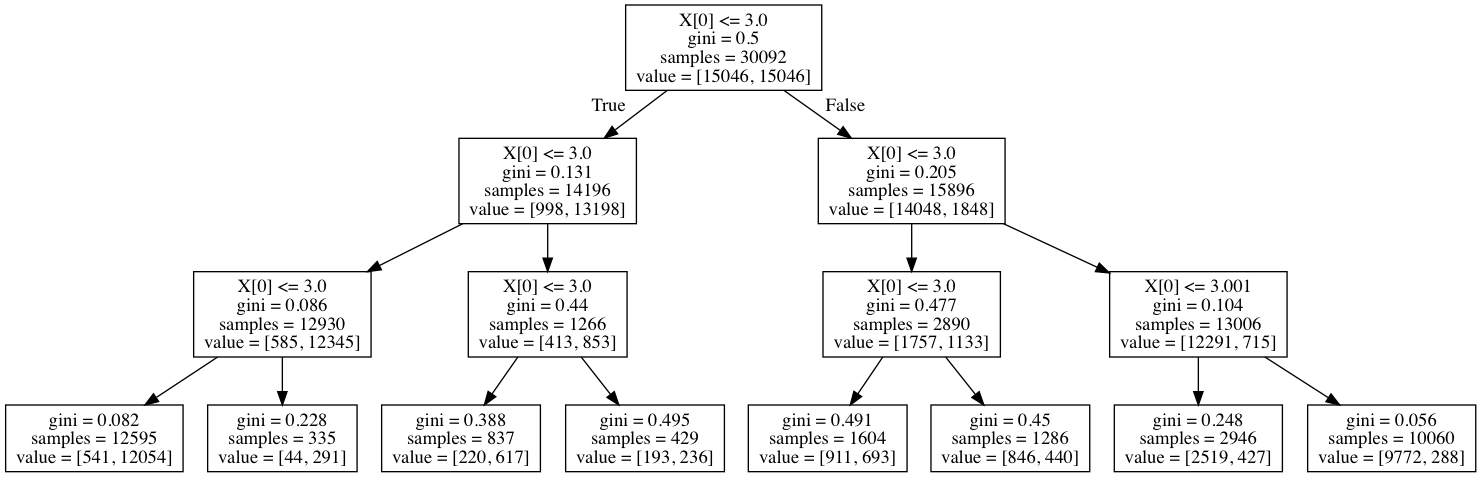

In [25]:
graph = export_graphviz(t1,out_file=None,)
graph = pydotplus.graph_from_dot_data(graph)
Image(graph.create_png())